In [6]:
input_file = "/Users/yuxin/sumdata/DUC2004/input.txt"
ref_file ="/Users/yuxin/sumdata/DUC2004/task1_ref0.txt"
m0_output = "/Users/yuxin/Yuxin/TokyoTechWinterProgram/experiment/output/m5/textsum_m5_epoch13_beam5_min10_max14_pred_duc2004.txt"
m1_output = "/Users/yuxin/Yuxin/TokyoTechWinterProgram/experiment/output/m4/textsum_m4_epoch15_beam5_min18_max22_pred_duc2004_detagged.txt"

In [2]:
from __future__ import print_function

In [110]:
import re

p = "\d*\.?\d+"
to_remove = "(\.|,|``|'')"
#rex_to_remove = '|'.join(to_remove)
#print(rex_to_remove)

def standardize(myStr):
    new_string = re.subn(p,'#', myStr)[0]
    #print(new_string)
    new_string = re.subn(to_remove,'', new_string)[0]
    #print(new_string)
    return new_string
    

In [111]:
re.findall(to_remove, my_str)

['``', "''", ',', ',', '.']

In [109]:
my_str = "the european union on friday expressed its `` deep concern '' over reports of physical abuse of malaysia 's former deputy-prime minister , anwar ibrahim , who was arrested last month ."
print(standardize(my_str))

the european union on friday expressed its  deep concern  over reports of physical abuse of malaysia 's former deputy-prime minister  anwar ibrahim  who was arrested last month 


In [144]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
#from collections import Counter


total_ref_token,total_m0_token,total_m1_token = 0,0,0
total_ref_bigram,total_m0_bigram,total_m1_bigram = 0,0,0
total_ref_trigram,total_m0_trigram,total_m1_trigram = 0,0,0
total_ref_novel_unigram, total_m0_novel_unigram,total_m1_novel_unigram = 0,0,0
total_ref_novel_bigram, total_m0_novel_bigram,total_m1_novel_bigram = 0,0,0
total_ref_novel_trigram, total_m0_novel_trigram,total_m1_novel_trigram = 0,0,0


with open(input_file) as input, open(ref_file) as ref, open(m0_output) as m0_out, open(m1_output) as m1_out:
    count = 1
    while count<=500:
        source = input.readline().strip()
        ref_summary = ref.readline().strip()
        m0_summary = m0_out.readline().strip()
        m1_summary = m1_out.readline().strip()
        #standardization
        source = standardize(source)
        ref_summary = standardize(ref_summary)
        m0_summary = standardize(m0_summary)
        m1_summary = standardize(m1_summary)
        #tokenisation
        source_token = nltk.word_tokenize(source)
        ref_token = nltk.word_tokenize(ref_summary)
        m0_summary_token = nltk.word_tokenize(m0_summary)
        m1_summary_token = nltk.word_tokenize(m1_summary)
        total_ref_token += len(ref_token)
        total_m0_token += len(m0_summary_token)
        total_m1_token += len(m1_summary_token) 
        #print(source_token)
        #print(ref_token)
        #print(m0_summary_token)
        #print(m1_summary_token)
        ref_novel = [token for token in ref_token if token not in source_token]
        m0_novel = [token for token in m0_summary_token if token not in source_token]
        m1_novel = [token for token in m1_summary_token if token not in source_token]
        total_ref_novel_unigram += len(ref_novel)
        total_m0_novel_unigram += len(m0_novel)
        total_m1_novel_unigram += len(m1_novel)
        #print(len(ref_novel))
        #print(len(m0_novel))
        #print(len(m1_novel))
        
        #bigrams
        source_bigram = list(ngrams(source_token,2))
        ref_bigram = list(ngrams(ref_token,2))
        m0_summary_bigram = list(ngrams(m0_summary_token,2))
        m1_summary_bigram = list(ngrams(m1_summary_token,2))
        total_ref_bigram += len(ref_bigram)
        total_m0_bigram += len(m0_summary_bigram)
        total_m1_bigram += len(m1_summary_bigram)
        ref_novel = [bigram for bigram in ref_bigram if bigram not in source_bigram]
        m0_novel = [bigram for bigram in m0_summary_bigram if bigram not in source_bigram]
        m1_novel = [bigram for bigram in m1_summary_bigram if bigram not in source_bigram]
        total_ref_novel_bigram += len(ref_novel)
        total_m0_novel_bigram += len(m0_novel)
        total_m1_novel_bigram += len(m1_novel)
        
        #trigram
        source_trigram = list(ngrams(source_token,3))
        ref_trigram = list(ngrams(ref_token,3))
        m0_summary_trigram = list(ngrams(m0_summary_token,3))
        m1_summary_trigram = list(ngrams(m1_summary_token,3))
        total_ref_trigram += len(ref_trigram)
        total_m0_trigram += len(m0_summary_trigram)
        total_m1_trigram += len(m1_summary_trigram)
        ref_novel = [trigram for trigram in ref_trigram if trigram not in source_trigram]
        m0_novel = [trigram for trigram in m0_summary_trigram if trigram not in source_trigram]
        m1_novel = [trigram for trigram in m1_summary_trigram if trigram not in source_trigram]
        total_ref_novel_trigram += len(ref_novel)
        total_m0_novel_trigram += len(m0_novel)
        total_m1_novel_trigram += len(m1_novel)        
        #print("*"*30)
        count += 1
#print(count)
#print(total_ref_novel_bigram)
#print(total_m0_novel_bigram)
#print(total_m1_novel_bigram)

print(total_ref_novel_trigram)
print(total_m0_novel_trigram)
print(total_m1_novel_trigram)

print("% of novel unigrams:")
print("ref:{0:.2f}%".format(1.0*total_ref_novel_unigram/total_ref_token*100))
print("m0:{0:.2f}%".format(1.0*total_m0_novel_unigram/total_m0_token*100))
print("m1:{0:.2f}%".format(1.0*total_m1_novel_unigram/total_m1_token*100))
print("*"*30)
print("% of novel bigrams:")
print("ref:{0:.2f}%".format(1.0*total_ref_novel_bigram/total_ref_bigram*100))
print("m0:{0:.2f}%".format(1.0*total_m0_novel_bigram/total_m0_bigram*100))
print("m1:{0:.2f}%".format(1.0*total_m1_novel_bigram/total_m1_bigram*100))
print("*"*30)
print("% of novel trigrams:")
print("ref:{0:.2f}%".format(1.0*total_ref_novel_trigram/total_ref_trigram*100))
print("m0:{0:.2f}%".format(1.0*total_m0_novel_trigram/total_m0_trigram*100))
print("m1:{0:.2f}%".format(1.0*total_m1_novel_trigram/total_m1_trigram*100))

4238
3044
3256
% of novel unigrams:
ref:70.17%
m0:23.33%
m1:24.58%
******************************
% of novel bigrams:
ref:92.59%
m0:60.13%
m1:62.54%
******************************
% of novel trigrams:
ref:97.78%
m0:80.02%
m1:81.50%


In [169]:
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [196]:
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd
import numpy as np
objects = ['unigrams','bigrams','trigrams']
legends = ['Model_0 (attentional seq2seq baseline)','Model_1 (with SRL tags)','Reference summaries']
ind = 1.2*np.arange(len(objects))  # the x locations for the first group
m0_y = [23.33,60.13,80.02]
m1_y = [24.58,62.54,81.50]
ref_y = [70.17,92.59,97.78]


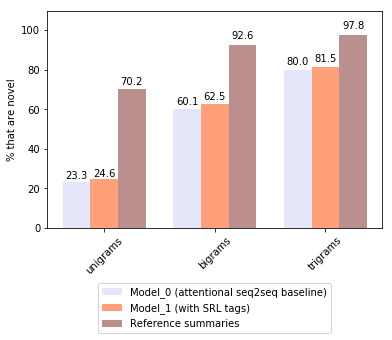

In [202]:
fig = plt.figure()
plt.ylim([0,100*1.1])
ax = fig.add_subplot(111)

width = 0.3
rects1 = ax.bar(ind, m0_y, width, color='lavender')
rects2 = ax.bar(ind+width, m1_y, width, color='lightsalmon')
rects3 = ax.bar(ind+width*2, ref_y, width, color='rosybrown')

ax.set_ylabel('% that are novel')
ax.set_xticks(ind+width)
ax.set_xticklabels(objects,rotation=45)
ax.legend((rects1[0], rects2[0], rects3[0]), legends,loc='upper center',bbox_to_anchor=(0.5, -0.23),
          fancybox=True)

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '%.1f' % float(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.savefig('/Users/yuxin/Yuxin/TokyoTechWinterProgram/Research Record/report_figures/novel_ngrams.png',figsize=(8, 6), dpi=320, bbox_inches='tight')
plt.show()